# SentimentScope: Sentiment Analysis using Transformers!
## Introduction <a name = "introduction"></a>

### Project Outline

This notebook is organized into the following sections:


1. [Introduction](#introduction): Overview of the project, learning objectives, and understanding sentiment analysis.
2. [Load, Explore, and Prepare the Dataset](#load-explore-and-prepare-the-dataset): Load the IMDB dataset, explore it with visualizations, and split it into training and validation sets.
3. [Implement a DataLoader in PyTorch](#implement-a-dataloader-in-pytorch): Create the `IMDBDataset` class and use it with the PyTorch `DataLoader`, including tokenization.
4. [Customize the Transformer Architecture](#customize-the-transformer-architecture): Modify the transformer model for binary classification.
5. [Implement Accuracy Calculation Method](#implement-accuracy-calculation-method): Create a function to compute accuracy for monitoring performance.
6. [Train the Model](#train-the-model): Complete and execute the training loop for binary classification.
7. [Test the Model](#test-the-model): Evaluate the model on the test dataset and ensure it achieves over 75% accuracy.
8. [Conclusion](#conclusion): Summarize the project results and key takeaways.

Click on the section titles above to navigate directly to the corresponding part of the notebook!

### Data Description

The dataset used in this project is the [IMDB dataset](https://ai.stanford.edu/~amaas/data/sentiment/), provided in the `Data` folder. with  the following folder structure:

```
aclIMDB/
├── train/
│   ├── pos/    # Positive reviews for training
│   ├── neg/    # Negative reviews for training
│   ├── unsup/  # Unsupervised data (not used in this project)
├── test/
│   ├── pos/    # Positive reviews for testing
│   ├── neg/    # Negative reviews for testing
```

- **train/**: Contains labeled data for training the model. Reviews in the `pos/` folder should be labeled as positive (1), while reviews in the `neg/` folder should be labeled as negative (0).
- **test/**: Contains labeled data for evaluating the model. Similar to the training data, `pos/` and `neg/` contain positive and negative reviews, respectively.
- **unsup/**: Contains unlabeled reviews that are not used in this project.

Understanding the folder structure is crucial as it guides how we load and preprocess the data for the sentiment classification task.

---


## <a name="load-explore-and-prepare-the-dataset"></a>Load, Explore, and Prepare the Dataset

### 1. Load the Dataset



In [63]:
import os
import pandas as pd
import json



Assign the paths of these folders relative to the starter file in the variables below.


In [64]:
# Define paths to dataset
train_pos_path = 'Data/aclImdb_v1/aclImdb/train/pos' # Path to the directory containing positive reviews from the training set
train_neg_path = 'Data/aclImdb_v1/aclImdb/train/neg' # Path to the directory containing negative reviews from the training set
test_pos_path = 'Data/aclImdb_v1/aclImdb/test/pos' # Path to the directory containing positive reviews from the test set
test_neg_path = 'Data/aclImdb_v1/aclImdb/test/neg' # Path to the directory containing negative reviews from the test set

Now, you will implement the `load_dataset()` function, which reads all text files in a specified folder and returns their content as a list of strings. This function is essential for loading and preprocessing the dataset in subsequent steps.

In [65]:
import os
def load_dataset(folder):
    """
    Reads all text files in the specified folder and returns their content as a list.

    Args:
        folder (str): Path to the folder containing text files.

    Returns:
        list: A list of strings, where each string is the content of a text file.
    """
    dataSet = []
    files = os.listdir(path=folder)
    total_number_files = len(files)
    adder = 0
    for file in files:
        adder +=1
        if file.endswith(".txt"):
            file_path = os.path.join(folder, file)
            with open(file_path, "r", encoding="utf-8") as temp:
                content = temp.read()
                dataSet.append(content)
            print(f"{adder} / {total_number_files} Done")



    return dataSet
    
    

Use the function now to load the training and testing data:

In [66]:
# Load training and testing data
print("================================")
print("The postive feedback traning set")
print("================================")
train_pos = load_dataset(train_pos_path)


print("================================")
print("The Negative feedback traning set")
print("================================")
train_neg = load_dataset(train_neg_path)

print("================================")
print("The postive feedback testing set")
print("================================")
test_pos = load_dataset(test_pos_path)

print("================================")
print("The negative feedback testing set")
print("================================")
test_neg = load_dataset(test_neg_path)

The postive feedback traning set
1 / 12500 Done
2 / 12500 Done
3 / 12500 Done
4 / 12500 Done
5 / 12500 Done
6 / 12500 Done
7 / 12500 Done
8 / 12500 Done
9 / 12500 Done
10 / 12500 Done
11 / 12500 Done
12 / 12500 Done
13 / 12500 Done
14 / 12500 Done
15 / 12500 Done
16 / 12500 Done
17 / 12500 Done
18 / 12500 Done
19 / 12500 Done
20 / 12500 Done
21 / 12500 Done
22 / 12500 Done
23 / 12500 Done
24 / 12500 Done
25 / 12500 Done
26 / 12500 Done
27 / 12500 Done
28 / 12500 Done
29 / 12500 Done
30 / 12500 Done
31 / 12500 Done
32 / 12500 Done
33 / 12500 Done
34 / 12500 Done
35 / 12500 Done
36 / 12500 Done
37 / 12500 Done
38 / 12500 Done
39 / 12500 Done
40 / 12500 Done
41 / 12500 Done
42 / 12500 Done
43 / 12500 Done
44 / 12500 Done
45 / 12500 Done
46 / 12500 Done
47 / 12500 Done
48 / 12500 Done
49 / 12500 Done
50 / 12500 Done
51 / 12500 Done
52 / 12500 Done
53 / 12500 Done
54 / 12500 Done
55 / 12500 Done
56 / 12500 Done
57 / 12500 Done
58 / 12500 Done
59 / 12500 Done
60 / 12500 Done
61 / 12500 Done


Now Saving the results in a json file so we can use it later if needed by creating two functions one for saving and the other for loading

In [67]:
def save_datasets(save_folder, train_pos, train_neg, test_pos, test_neg):
    """
    Saves all four datasets as JSON files into the specified folder.
    """
    os.makedirs(save_folder, exist_ok=True)

    files = {
        "train_pos.json": train_pos,
        "train_neg.json": train_neg,
        "test_pos.json": test_pos,
        "test_neg.json": test_neg
    }

    for filename, data in files.items():
        path = os.path.join(save_folder, filename)
        with open(path, "w", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False)
        print(f"Saved -> {filename}")


In [68]:
def load_datasets(save_folder):
    """
    Loads all datasets from the specified save folder.
    Returns: train_pos, train_neg, test_pos, test_neg
    """
    filenames = [
        "train_pos.json",
        "train_neg.json",
        "test_pos.json",
        "test_neg.json"
    ]

    loaded = []

    for filename in filenames:
        path = os.path.join(save_folder, filename)
        with open(path, "r", encoding="utf-8") as f:
            data = json.load(f)
        loaded.append(data)
        print(f"Loaded -> {filename}")

    return loaded  # returns them in order

In [69]:
# Save the data in files
save_datasets(
    save_folder="cached_data",
    train_pos=train_pos,
    train_neg=train_neg,
    test_pos=test_pos,
    test_neg=test_neg
)

Saved -> train_pos.json
Saved -> train_neg.json
Saved -> test_pos.json
Saved -> test_neg.json


In [70]:
# Un comment this in order to use the last saved json files
#train_pos, train_neg, test_pos, test_neg = load_datasets("cached_data")

We can convert the data into pandas dataframes to make handling the datasets easier.

In [71]:
# Create DataFrames
train_df = pd.DataFrame({
    'review': train_pos + train_neg,
    'label': [1] * len(train_pos) + [0] * len(train_neg)
})

test_df = pd.DataFrame({
    'review': test_pos + test_neg,
    'label': [1] * len(test_pos) + [0] * len(test_neg)
})

print(train_df.head())

                                              review  label
0  Bromwell High is a cartoon comedy. It ran at t...      1
1  Homelessness (or Houselessness as George Carli...      1
2  Brilliant over-acting by Lesley Ann Warren. Be...      1
3  This is easily the most underrated film inn th...      1
4  This is not the typical Mel Brooks film. It wa...      1


### 2. Explore the Dataset

In [72]:
print(train_df.info(), train_df.describe())
print("============")
print(test_df.info(), test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None              label
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None              label
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000


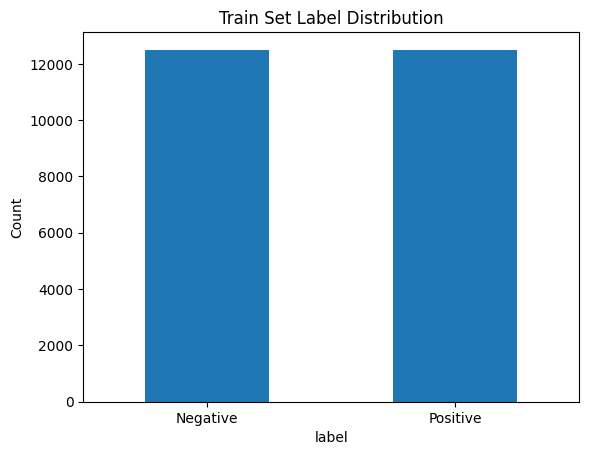

In [73]:
import matplotlib.pyplot as plt

train_df['label'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Negative', 'Positive'], rotation=0)
plt.title("Train Set Label Distribution")
plt.ylabel("Count")
plt.show()


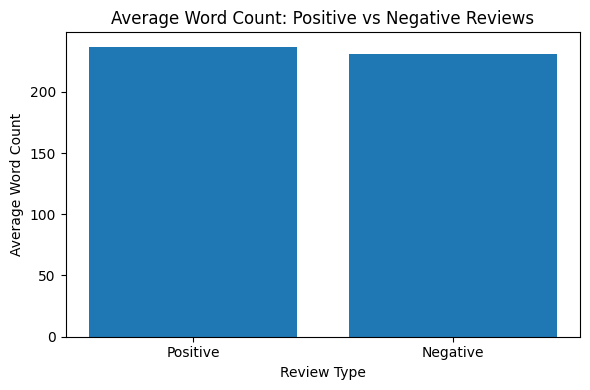

In [74]:
positive_review = train_df[train_df['label'] == 1]
negative_review = train_df[train_df['label'] == 0]
positive_word_counts = positive_review["review"].str.split().str.len()
negative_word_counts = negative_review["review"].str.split().str.len()

avg_positive = positive_word_counts.mean()
avg_negative = negative_word_counts.mean()

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Negative'], [avg_positive, avg_negative])
plt.title("Average Word Count: Positive vs Negative Reviews")
plt.xlabel("Review Type")
plt.ylabel("Average Word Count")
plt.tight_layout()
plt.show()

In [75]:
print(positive_review.head())
print("===============================================================")
print(negative_review.head())

                                              review  label
0  Bromwell High is a cartoon comedy. It ran at t...      1
1  Homelessness (or Houselessness as George Carli...      1
2  Brilliant over-acting by Lesley Ann Warren. Be...      1
3  This is easily the most underrated film inn th...      1
4  This is not the typical Mel Brooks film. It wa...      1
                                                  review  label
12500  Story of a man who has unnatural feelings for ...      0
12501  Airport '77 starts as a brand new luxury 747 p...      0
12502  This film lacked something I couldn't put my f...      0
12503  Sorry everyone,,, I know this is supposed to b...      0
12504  When I was little my parents took me along to ...      0


### 3. Prepare the Dataset
We will split the training data further into training and validation subsets. The way we constructed the dataset, reviews with positive and negative labels are segregated. To ensure that the validation dataset works well, we first need to shuffle the dataset.


In [76]:
# Split train data into training and validation sets manually
train_size = int(0.9 * len(train_df))
# Shuffle the dataset
shuffled_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data = shuffled_df.iloc[:train_size]
val_data = shuffled_df.iloc[train_size:]

### 4. Testing the Tokenizer



In [77]:
from transformers import AutoTokenizer

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

This initializes a tokenizer tailored for the `bert-base-uncased` model. You can refer to the [Hugging Face AutoTokenizer documentation](https://huggingface.co/docs/transformers/main_classes/tokenizer) for more details. You can find the definition of the `from_pretrained()` method [here](https://huggingface.co/docs/transformers/v4.48.0/en/model_doc/auto#transformers.AutoTokenizer.from_pretrained).

Instead of tokenizing the entire dataset, we will test the tokenizer on a few sample reviews directly from the dataset:


In [78]:
# Take sample inputs from the dataset
sample_texts = train_data['review'].sample(3, random_state=42).tolist()

# Tokenize sample inputs
tokenized_samples = tokenizer(sample_texts, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

In [79]:
print(sample_texts)

['Although the movie is clearly dated, audiences can still easily identify with the plight of hapless Buster in this timeless and very funny underdog tale. Buster fights against unkindly odds in three different ages: the Stone Age, The Roman Age, and the Moden Age, playing almost the same character with just a change of scenery to help us identify the different "ages". In this movie we see one of the earliest comedic depictions of the "caveman" stereotype, who wins his love not by romance but by brute force, as well as a funny twist on Roman gladiatorial combat, two comedic sketches that long predate such spoofs as Mel Brooks\' "History of the World: Part I". The underlying theme of the movie is simple yet convincing: Although the times may have-a-changed, we still face the same struggles even in modern times that we fought in prehistoric times in order to "win the girl" (keep in mind this is the theme of 1923 America, a time when chauvinism was still en vogue). It is interesting to lo

In [80]:
print(tokenized_samples)

{'input_ids': tensor([[  101,  2348,  1996,  3185,  2003,  4415,  6052,  1010,  9501,  2064,
          2145,  4089,  6709,  2007,  1996, 24525,  1997,  5292, 21112,  2015,
         18396,  1999,  2023, 27768,  1998,  2200,  6057,  2104, 16168,  6925,
          1012, 18396,  9590,  2114,  4895, 18824,  2135, 10238,  1999,  2093,
          2367,  5535,  1024,  1996,  2962,  2287,  1010,  1996,  3142,  2287,
          1010,  1998,  1996,  5549,  2078,  2287,  1010,  2652,  2471,  1996,
          2168,  2839,  2007,  2074,  1037,  2689,  1997, 17363,  2000,  2393,
          2149,  6709,  1996,  2367,  1000,  5535,  1000,  1012,  1999,  2023,
          3185,  2057,  2156,  2028,  1997,  1996,  5700, 21699, 20818,  1997,
          1996,  1000,  5430,  2386,  1000, 12991, 13874,  1010,  2040,  5222,
          2010,  2293,  2025,  2011,  7472,  2021,  2011, 26128,  2486,  1010,
          2004,  2092,  2004,  1037,  6057,  9792,  2006,  3142,  5580,  2401,
         29469,  2389,  4337,  1010,  

# Implement a DataLoader in PyTorch<a id="implement-a-dataloader-in-pytorch"></a>


In [109]:
import torch
from torch.utils.data import Dataset
MAX_LENGTH = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [110]:
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """
    A custom PyTorch Dataset for the IMDB dataset.

    This class preprocesses text data using a tokenizer and returns tokenized inputs
    along with their corresponding labels for sentiment analysis.

    Attributes:
        data (pd.DataFrame): A DataFrame containing text and label columns.
        tokenizer (transformers.PreTrainedTokenizer): The tokenizer used for preprocessing text.
        max_length (int): Maximum length for tokenized sequences.
    """
    def __init__(self, data, tokenizer, max_length=MAX_LENGTH):
        """
        Initialize the dataset.

        Args:
            data (pd.DataFrame): A DataFrame with columns `review` (text) and `label` (target).
            tokenizer (transformers.PreTrainedTokenizer): The tokenizer to preprocess the text.
            max_length (int, optional): Maximum token sequence length. Defaults to 128.
        """
        # Initialize the dataset
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Number of samples.
        """
        # Return the length of the dataset
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieve a single data point by index and preprocess it.

        Args:
            idx (int): Index of the data point to retrieve.

        Returns:
            torch.Tensor: Tokenized input IDs for the text.
            int: Label corresponding to the text.
        """
        #TODO: Write code for the __getitem__() function
        row = self.data.iloc[idx]
        text = row['review']
        label = int(row['label'])

        tokens = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )['input_ids'].squeeze()

        return tokens, label


### 2. Initialize the Dataset

Once the `IMDBDataset` class is defined, we can initialize it directly with the training and validation DataFrames.

In [111]:
# Initialize the datasets
train_dataset = IMDBDataset(train_data, tokenizer)
val_dataset = IMDBDataset(val_data, tokenizer)
test_dataset = IMDBDataset(test_df, tokenizer)

In [112]:
print(train_dataset[0])

(tensor([  101,  1999,  6634,  1999,  1996,  4534,  2957, 15536, 22117, 17007,
         3248,  1057,  1012,  1055,  1012,  3212,  3460,  2040,  2038,  2010,
         2733, 12726,  2135,  7153,  2007,  1037, 11547,  2008,  3397, 11629,
         1012,  2004,  8872,  2703,  5203,  7919,  2685,  2041,  1996,  3124,
         2351,  2013,  2048, 10432,  1999,  1996,  3108,  1012,  2008,  1005,
         1055,  2025,  1996,  3277,  2182,  1010,  1996,  2048,  1997,  2068,
         2468, 15175,  5826,  1999,  2019,  3947,  2000,  2424,  1996, 15978,
         1998,  3087,  2842,  6086,  2000,  1996,  4295,  1012,  1026,  7987,
         1013,  1028,  1026,  7987,  1013,  1028,  2004,  2001,  4197,  2041,
         2011,  2151,  2193,  1997,  2111,  1010,  2005,  2070,  3114,  2472,
        12005,  2050, 22001,  2106,  2025,  8572,  2000,  3459,  1996,  2235,
         3033,  2007,  3087,  2008,  4165,  2066,  2027,  1005,  2128,  2013,
         5773,  1012,  2383,  2042,  2000,  2047,  5979,   102]

### 3. Create a DataLoader

The `DataLoader` class in PyTorch helps manage batches of data during training. We will use it to create training and validation data loaders.

In [113]:
from torch.utils.data import DataLoader

# Define batch size
BATCH_SIZE = 32

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

## <a id="customize-the-transformer-architecture"></a>Customize the Transformer Architecture


### 1. Config Dictionary
Below is the config that we will use in our model:

In [114]:
config = {
    "vocabulary_size": tokenizer.vocab_size,  # e.g., ~30522 for bert-base-uncased
    "num_classes": 2,                         # binary classification (pos/neg)
    "d_embed": 256,
    "context_size": MAX_LENGTH,
    "layers_num": 6,
    "heads_num":8,
    "head_size": 32,  # 4 heads * 32 = 128 -> matches d_embed
    "dropout_rate": 0.1,
    "use_bias": True
}

Key Config Parameters:
- `vocabulary_size`: The total number of tokens in your vocabulary.
- `num_classes`: The number of classes for the classification head (2 = binary).
- `d_embed`: Dimensionality of embeddings (and hidden layers).
- `context_size`: Maximum sequence length for each input.
- `layers_num`: Number of stacked transformer blocks.
- `heads_num`: Number of attention heads in multi-head attention.
- `head_size`: Dimension of each attention head (must satisfy heads_num * head_size = d_embed).
- `dropout_rate`: Probability of dropping units during training to reduce overfitting.
- `use_bias`: Whether linear layers should have bias terms.



### 2. Class Definitions

Below are the class definitions you will work with. These classes form the core components of the transformer model. You may have seen these before, with the exception of the `DemoGPT` class which will need to be customized.


#### AttentionHead

In [115]:
import torch.nn as nn
import math

class AttentionHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.Q_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.K_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.V_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])

        self.dropout = nn.Dropout(config["dropout_rate"])

        # keep buffer (not used anymore, but left untouched to avoid changing anything else)
        casual_attention_mask = torch.tril(torch.ones(config["context_size"], config["context_size"]))
        self.register_buffer('casual_attention_mask', casual_attention_mask)

    def forward(self, input):
        batch_size, tokens_num, d_embed = input.shape

        Q = self.Q_weights(input)  # (B, T, head_size)
        K = self.K_weights(input)  # (B, T, head_size)
        V = self.V_weights(input)  # (B, T, head_size)

        # Q @ K^T => (B, T, T)
        attention_scores = Q @ K.transpose(1, 2)

        # Removed causal mask completely
        # (full bidirectional attention: every token attends to every other token)

        attention_scores = attention_scores / math.sqrt(K.shape[-1])
        attention_scores = torch.softmax(attention_scores, dim=-1)
        attention_scores = self.dropout(attention_scores)

        return attention_scores @ V


Here we use a dummy input aligned with our config:

- Batch size = `BATCH_SIZE` (32)
- Sequence length = `config["context_size"]` (128)
- Embedding dimension = `config["d_embed"]` (128)


In [116]:
# Instantiate the AttentionHead
attention_head = AttentionHead(config).to(device)

# Create a dummy input of shape (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
attention_output = attention_head(dummy_input)
print("AttentionHead output shape:", attention_output.shape)

AttentionHead output shape: torch.Size([32, 128, 32])




#### MultiHeadAttention


In [117]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        heads_list = [AttentionHead(config) for _ in range(config["heads_num"])]
        self.heads = nn.ModuleList(heads_list)

        self.linear = nn.Linear(config["heads_num"] * config["head_size"], config["d_embed"])
        self.dropout = nn.Dropout(config["dropout_rate"])

    def forward(self, input):
        heads_outputs = [head(input) for head in self.heads]
        x = torch.cat(heads_outputs, dim=-1)  # (B, T, heads_num * head_size)
        x = self.linear(x)                   # (B, T, d_embed)
        x = self.dropout(x)
        return x

In [118]:
# Instantiate MultiHeadAttention
multi_head_attention = MultiHeadAttention(config).to(device)

# Same dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
mha_output = multi_head_attention(dummy_input)
print("MultiHeadAttention output shape:", mha_output.shape)

MultiHeadAttention output shape: torch.Size([32, 128, 256])



#### FeedForward


In [119]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear_layers = nn.Sequential(
            nn.Linear(config["d_embed"], 4 * config["d_embed"]),
            nn.GELU(),
            nn.Linear(4 * config["d_embed"], config["d_embed"]),
            nn.Dropout(config["dropout_rate"])
        )

    def forward(self, input):
        return self.linear_layers(input)

In [120]:
# Instantiate FeedForward
feed_forward = FeedForward(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
ff_output = feed_forward(dummy_input)
print("FeedForward output shape:", ff_output.shape)

FeedForward output shape: torch.Size([32, 128, 256])



#### Block


In [121]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.multi_head = MultiHeadAttention(config)
        self.layer_norm_1 = nn.LayerNorm(config["d_embed"])

        self.feed_forward = FeedForward(config)
        self.layer_norm_2 = nn.LayerNorm(config["d_embed"])

    def forward(self, input):
        x = input
        x = x + self.multi_head(self.layer_norm_1(x))
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x

In [122]:
# Instantiate a single Block
block = Block(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
block_output = block(dummy_input)
print("Block output shape:", block_output.shape)

Block output shape: torch.Size([32, 128, 256])




#### DemoGPT

In [123]:
class DemoGPT(nn.Module):
    def __init__(self, config):
        """
        Initialize the DemoGPT class with configuration parameters.

        Args:
        - config (dict): Configuration dictionary with the following keys:
            - "vocabulary_size": Size of the vocabulary.
            - "d_embed": Dimensionality of the embedding vectors.
            - "context_size": Maximum sequence length (context size).
            - "layers_num": Number of transformer layers.
            - "num_classes": Number of output classes (2 for binary classification).
        """
        super().__init__()
        # Token embedding layer: Maps token indices to embedding vectors.
        self.token_embedding_layer = nn.Embedding(config["vocabulary_size"], config["d_embed"])
        
        # Positional embedding layer: Adds positional information to the embeddings.
        self.positional_embedding_layer = nn.Embedding(config["context_size"], config["d_embed"])
        
        # Transformer layers: Stacked sequence of transformer blocks.
        blocks = [Block(config) for _ in range(config["layers_num"])]
        self.layers = nn.Sequential(*blocks)
        
        # Layer normalization: Applied to stabilize training.
        self.layer_norm = nn.LayerNorm(config["d_embed"])
        
        # Implement classification output layer - Maps pooled embeddings to class logits.
        self.classifier = nn.Linear(
            config["d_embed"], config["num_classes"], bias=False
        )

    def forward(self, token_ids):
        """
        Forward pass of the model.

        Args:
        - token_ids (torch.Tensor): Input token indices of shape (B, T), 
                                    where B is the batch size, and T is the sequence length.
        
        Returns:
        - logits (torch.Tensor): Output logits of shape (B, num_classes).
        """
        batch_size, tokens_num = token_ids.shape

        # Step 1: Create embeddings for tokens and their positions
        x = self.token_embedding_layer(token_ids)  # Shape: (B, T, d_embed)
        positions = torch.arange(tokens_num, device=token_ids.device)  # Shape: (T,)
        pos_embed = self.positional_embedding_layer(positions)  # Shape: (T, d_embed)
        x = x + pos_embed.unsqueeze(0)  # Add positional embeddings to token embeddings
        
        # Step 2: Pass embeddings through transformer layers
        x = self.layers(x)  # Shape: (B, T, d_embed)
        x = self.layer_norm(x)  # Normalize across the feature dimension
        
        # Step 3: Apply mean pooling across the time dimension  # Shape: (B, d_embed)
        mean_pooled = x.mean(dim=1)
        
        # Step 4: Generate logits for classification  # Shape: (B, num_classes)
        logits = self.classifier(mean_pooled)
        
        return logits

In [124]:
# Instantiate the model
demo_gpt = DemoGPT(config).to(device)

# Suppose we have a batch of size 32, each with a sequence length of 128
dummy_token_ids = torch.randint(
    0, config["vocabulary_size"], 
    (BATCH_SIZE, config["context_size"])
).to(device)

# Forward pass
logits = demo_gpt(dummy_token_ids)

print("DemoGPT output shape:", logits.shape)
print("Logits sample:\n", logits[:2])  # Print first two examples' logits

DemoGPT output shape: torch.Size([32, 2])
Logits sample:
 tensor([[0.0829, 0.0097],
        [0.0750, 0.1123]], device='cuda:0', grad_fn=<SliceBackward0>)


## Implement Accuracy Calculation Method <a name="implement-accuracy-calculation-method"></a>

The function to calculate validation accuracy will:

- Evaluate the model on the validation dataset.
- Generate predictions for each batch.
- Compare predictions with the true labels.
- Compute the percentage of correctly classified examples.

In [125]:
def calculate_accuracy(model, data_loader, device):
    """
    Calculate the accuracy of the model on the validation dataset.

    Args:
        model (torch.nn.Module): The trained transformer model.
        
         
           (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        device (torch.device): Device to run the model (e.g., 'cuda' or 'cpu').

    Returns:
        float: Validation accuracy as a percentage.
    """
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)               # Forward pass
            pred = torch.argmax(outputs, dim=1)  # Predicted class
            total_correct += (pred == targets).sum().item()
            total_samples += targets.size(0)
    accuracy = (total_correct / total_samples) * 100
    return accuracy


In [126]:
model = DemoGPT(config).to(device)

In [127]:
validation_accuracy = calculate_accuracy(model, val_loader, device)
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Validation Accuracy: 53.24%


As you can see, the validation accuracy is close to 50%. This is expected as the model's parameters have been initialized randomly. 

## Train the Model <a name="train-the-model"></a>

In this section, we will define the training loop for the transformer-based model designed for sentiment analysis. The training loop is crucial for optimizing the model's weights and biases to minimize the loss function and improve classification performance.

### Training Loop

The training loop will involve the following steps:

1. **Iterate through epochs**: Repeat the training process for a predefined number of epochs.
2. **Load batches of data**: Use the `DataLoader` to retrieve batches of input IDs and labels.
3. **Forward pass**: Compute the logits by passing the input IDs through the model.
4. **Compute loss**: Use cross-entropy loss as the criterion.
5. **Backward pass and optimization**: Backpropagate the loss and update the model parameters using the optimizer.
6. **Validation**: Calculate the validation accuracy after each epoch.


In [130]:
import torch.optim as optim
import torch.nn as nn

# Training parameters
EPOCHS = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, and optimizer
model = DemoGPT(config).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for step, (input_ids, labels) in enumerate(train_loader):
        # Move data to device
        input_ids = input_ids.to(device)
        labels = labels.to(device)

        # Forward pass
        logits = model(input_ids)

        # Compute loss (sentence-level classification)
        loss = criterion(logits, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Print progress every 100 steps
        if (step + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{step+1}/{len(train_loader)}], "
                  f"Loss: {running_loss/100:.4f}")
            running_loss = 0.0

    # Evaluate validation accuracy
    val_accuracy = calculate_accuracy(model, val_loader, device)
    print(f"Epoch {epoch+1} - Validation Accuracy: {val_accuracy:.2f}%")


Epoch [1/10], Step [100/704], Loss: 0.7074
Epoch [1/10], Step [200/704], Loss: 0.6697
Epoch [1/10], Step [300/704], Loss: 0.6019
Epoch [1/10], Step [400/704], Loss: 0.5727
Epoch [1/10], Step [500/704], Loss: 0.5431
Epoch [1/10], Step [600/704], Loss: 0.5105
Epoch [1/10], Step [700/704], Loss: 0.4996
Epoch 1 - Validation Accuracy: 77.16%
Epoch [2/10], Step [100/704], Loss: 0.4380
Epoch [2/10], Step [200/704], Loss: 0.4277
Epoch [2/10], Step [300/704], Loss: 0.4706
Epoch [2/10], Step [400/704], Loss: 0.4181
Epoch [2/10], Step [500/704], Loss: 0.4402
Epoch [2/10], Step [600/704], Loss: 0.4278
Epoch [2/10], Step [700/704], Loss: 0.4274
Epoch 2 - Validation Accuracy: 78.96%
Epoch [3/10], Step [100/704], Loss: 0.3708
Epoch [3/10], Step [200/704], Loss: 0.3681
Epoch [3/10], Step [300/704], Loss: 0.3583
Epoch [3/10], Step [400/704], Loss: 0.3552
Epoch [3/10], Step [500/704], Loss: 0.3711
Epoch [3/10], Step [600/704], Loss: 0.3731
Epoch [3/10], Step [700/704], Loss: 0.3671
Epoch 3 - Validation 

KeyboardInterrupt: 

Saving the model parameters

In [131]:
import pickle

def save_pickle(obj, filename):
    """
    Save a Python object to a pickle file.
    
    Args:
        obj: Python object to save
        filename: Path to the file (e.g., "model_results.pkl")
    """
    with open(filename, 'wb') as f:
        pickle.dump(obj, f)
    print(f"Saved object to {filename}")


In [132]:
# Save the trained model state_dict
save_pickle(model.state_dict(), "demo_gpt_model.pkl")

# Optionally, save training results (like validation accuracy per epoch)
training_results = {"val_accuracy": [val_accuracy]}  # you can append per epoch
save_pickle(training_results, "training_results.pkl")

Saved object to demo_gpt_model.pkl
Saved object to training_results.pkl


In [133]:
def load_pickle(filename):
    """
    Load a Python object from a pickle file.
    
    Args:
        filename: Path to the pickle file
    
    Returns:
        The loaded Python object
    """
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    print(f"Loaded object from {filename}")
    return obj


In [134]:
# Load model state_dict
loaded_state = load_pickle("demo_gpt_model.pkl")
model.load_state_dict(loaded_state)
model.to(device)

# Load training results
loaded_results = load_pickle("training_results.pkl")
print(loaded_results)


Loaded object from demo_gpt_model.pkl
Loaded object from training_results.pkl
{'val_accuracy': [82.16]}


## Test the Model <a name="test-the-model"></a>


In [135]:
test_accuracy = calculate_accuracy(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 78.06%


In [136]:
import torch

def classify_review(model, tokenizer, review_text, device):
    """
    Classifies a single movie review as Positive or Negative.

    Args:
        model (nn.Module): Trained transformer model.
        tokenizer: Hugging Face tokenizer.
        review_text (str): The review to classify.
        device: 'cuda' or 'cpu'.

    Returns:
        str: Predicted sentiment ('Positive' or 'Negative').
    """
    model.eval()  
    
    # Tokenize input review
    tokens = tokenizer(
        review_text,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='pt'
    )['input_ids'].to(device)

    # Forward pass
    with torch.no_grad():
        logits = model(tokens)
        predicted_class = torch.argmax(logits, dim=1).item()

    # Map numeric label to string
    sentiment = "Positive" if predicted_class == 1 else "Negative"
    return sentiment


review = "What is this! what waste of time"
prediction = classify_review(model, tokenizer, review, device)
print(f"Review: {review}")
print(f"Predicted Sentiment: {prediction}")

Review: What is this! what waste of time
Predicted Sentiment: Negative
